In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df_nfl = pd.read_csv('/Users/jahansilverman/Documents/CSVs for Data Science Projects/passing_cleaned.csv', header=0, 
                     index_col=0)

In [3]:
df_nfl.drop(['GS', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Yds-s', 'NY/A', 'ANY/A', '1D', 'Rate'], axis=1, inplace=True)

In [4]:
df_nfl.head()

,Player,Tm,Age,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Sk,Sk%,Year
0,Kurt Warner,STL,30,16,375,546,68.7,4830,36,6.6,22,4.0,38,6.5,2001
1,Peyton Manning,IND,25,16,343,547,62.7,4131,26,4.8,23,4.2,29,5.0,2001
2,Brett Favre,GNB,32,16,314,510,61.6,3921,32,6.3,15,2.9,22,4.1,2001
3,Aaron Brooks,NOR,25,16,312,558,55.9,3832,26,4.7,22,3.9,50,8.2,2001
4,Rich Gannon,OAK,36,16,361,549,65.8,3828,27,4.9,9,1.6,27,4.7,2001


In [5]:
df_nfl.dtypes

Player     object
Tm         object
Age         int64
G           int64
Cmp         int64
Att         int64
Cmp%      float64
Yds         int64
TD          int64
TD%       float64
Int         int64
Int%      float64
Sk          int64
Sk%       float64
Year        int64
dtype: object

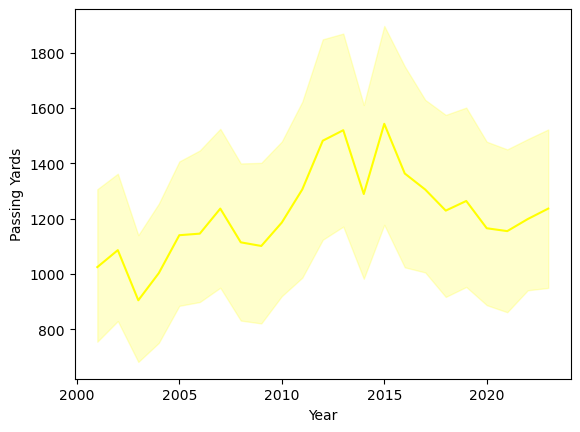

In [6]:
sns.lineplot(x='Year', y='Yds', data = df_nfl, color = 'Yellow')
plt.ylabel('Passing Yards')
plt.show()

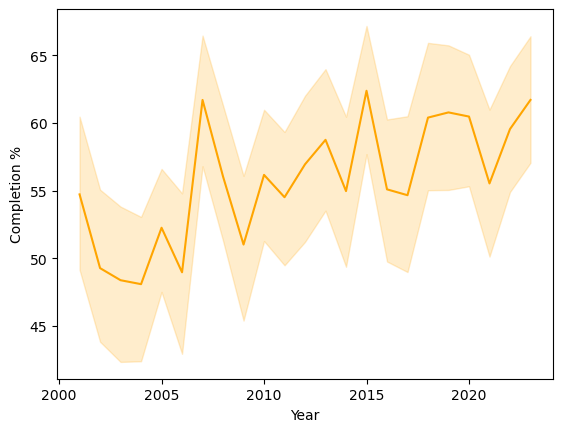

In [7]:
sns.lineplot(x='Year', y='Cmp%', data = df_nfl, color = 'Orange')
plt.ylabel('Completion %')
plt.show()

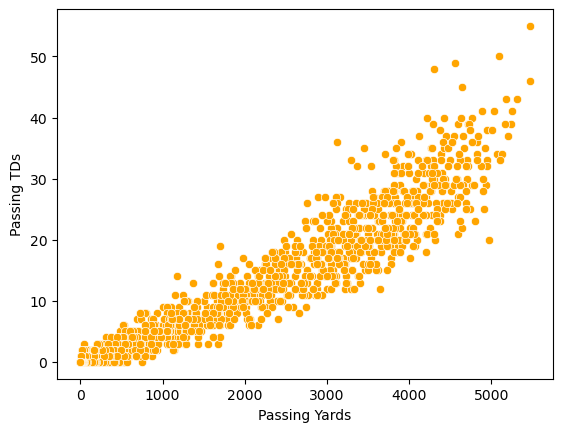

In [8]:
sns.scatterplot(x='Yds', y='TD', data = df_nfl, color = 'Orange')
plt.xlabel('Passing Yards')
plt.ylabel('Passing TDs')
plt.show()

In [9]:
x = df_nfl[['Age', 'G', 'Yds', 'Int', 'Sk']]
y = df_nfl['TD']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
print(x_train)

[[-0.03984093  0.83096271  1.75831933  0.61137355  1.39957648]
 [-0.27101673 -1.6538065  -0.77893345 -0.81289197 -0.80416945]
 [ 2.04074119  1.00844623  2.03637443  1.14547312  2.43258238]
 ...
 [-0.50219252  1.00844623  1.38189569  1.85760588  2.36371532]
 [ 0.19133486  1.00844623 -0.78024503 -0.81289197 -0.80416945]
 [-0.50219252 -1.12135596 -0.42611825 -0.2787924  -0.25323297]]


In [12]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [13]:
coeff_df_nfl = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df_nfl

,Coefficient
Age,-0.049996
G,0.092926
Yds,12.662820
Int,-1.584643
Sk,-1.683913


In [14]:
y_pred = regressor.predict(x_test)

In [15]:
df_actual_vs_predicted = pd.DataFrame({'Actual Passing TDs': y_test, 'Predicted Passing TDs': y_pred})
df_actual_vs_predicted['Predicted Passing TDs'].clip(lower=0, inplace=True)
df_actual_vs_predicted['Predicted Passing TDs'] = df_actual_vs_predicted['Predicted Passing TDs'].round().astype(int)
print(df_actual_vs_predicted.head(10).to_string(index=False))

 Actual Passing TDs  Predicted Passing TDs
                  0                      0
                  3                      3
                  0                      0
                 38                     34
                  4                      2
                  0                      0
                 20                     26
                 26                     23
                 33                     28
                  1                      0


In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4717482608256423
Mean Squared Error: 5.991615491269842
Root Mean Squared Error: 2.447777663773784


In [17]:
r_squared = regressor.score(x_test, y_test)
print('Coefficient of Determination:', r_squared)

Coefficient of Determination: 0.9439466990703236


In [18]:
print('Intercept:', regressor.intercept_)

Intercept: 7.270212765957447
